# Python Lesson 1: Introduction to Jupyter Notebooks, Analysis, and Plotting
![](img/day1.jpg)


Rebekah Esmaili (STAR/IMSG)

[rebekah.esmaili@gmail.com](mailto:rebekah.esmaili@gmail.com)

Code, Data, and Installation Guide: [https://ter.ps/noaapy](https://ter.ps/noaapy)

## Agenda

1. Why Python?
2. Objectives
3. Setting up your development environment
4. Reading and writing tabular data with the NumPy package
5. Encapsulating data with the Pandas package
6. Plotting with the Matplotlib package
7. Importing and inspecting NetCDF files

## Why Python?

Pros

* General-purpose, cross-platform  
* Free and open source  
* Resaonably easy to learn, good statistical and visualization packages/modules  
* Forces good syntax  
* Reads satellite data formats like HDF, NetCDF, GRIB 


Cons

* Performance penalties for interpretted languages  
* Packages are a "black box" and can be discontinued  

## Objective: working with satellite datasets

* You won't learn how to code in Python
* You will learn to:
	* Read/write ascii data
	* Basic plotting and visualization
	* Perform data filtering

Python is an interpretted language, so you as minimum you need to have Python on your computer.

## What is Anaconda?

* Anaconda is a package manager
* Comes bundled with Python, a lot of useful scientific/mathematical packages, and development environments.
* Easiest place to start if you new

## Development environments

* Spyder: most Matlab-like
* Jupyter notebooks: web based. Similar to Mathematica, runs code inline
* Text editor + run with command line for scripting

## Launching Jupyter Notebook

### Mac

* Open Anaconda Navigator and click on Jupyter Notebook


### Linux

* Open terminal, and type:
```
jupyter notebook    
```

### Windows

* Start -> Anaconda3 -> Jupyter Notebook

## Launching Jupyter Notebook

This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in. 

Click on New on the top right:

![](img/jn-screenshot.png)

<div class="alert alert-block alert-info">

# Exercise 1
## Set-up your environment

* For your opertating system, launch Jupyter Notebooks

## Create a notebook
* Create a new notebook
* Change the name from "untitled" to something better
* Save in the __same directory as the data folder__ that we provided (or move the data directory to the same place at the file because we'll need it later!).

</div>

In [ ]:
# This is a comment
print("hello world")

In [ ]:
# This is an array
test = [1,2,3,4,5]

In [ ]:
# This will show me the array
print(test)

In [ ]:
# So will this
test

In [ ]:
# Is this what you expected to happen?
test*2

In [ ]:
# This is a function (note the TAB!)
def Farenheit2Celsius(F):
    return (F-32)*5/9

# This calls the function
Farenheit2Celsius(32)

## Importing Packages
Packages give us additional functionality, saving us the trouble of writing procedures ourselves. 

Today we'll discuss:

* [NumPy](http://www.numpy.org/) Fast mathematical operations on large datasets.
* [Pandas](https://pandas.pydata.org) Encapsulation of data, easy read/write of ascii data. Builds extra functionality on top of NumPy.
* [Matplotlib](https://matplotlib.org) Primarily python plotting/visualization package. You can generate plots, histograms, scatterplots, etc., with just a few lines of code.

In [ ]:
import numpy as np

## NumPy

* Defining Arrays
* Array operations

In [ ]:
# Array operations
b = a.reshape(3,2)
b

In [ ]:
# Sum along rows
b.sum()

In [ ]:
# Get the minimum value along columns
b.min(axis=0)

In [ ]:
# Boolean operations
b>1

For more examples, work through the: [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

# Pandas
* A library that helps encapsulate data
* Comparable to data frames in R, structures in IDL, namespaces in C++ and modern Fortran

Pros:

* You can name columns and refence by labels instead of indices like in numpy arrays
* This also makes performing group operations easier and more readable

Cons:

* Pandas is a wrapper for NumPy, so there is some efficiency overhead
* NumPy arrays are better for referencing datasets > 2D

### Looking at real in-situ data: AERONET
* Aerosols are particles suspended in the atmosphere, including dust, sea salt, volcanic ash, smoke, and pollution.
* Aerosol Optical Depth (AOD) is a unitless measure of the amount of aerosols in the atmosphere.
* AERONET (AErosol RObotic NETwork) stations provide in-situ AOD observations.

In [8]:
import pandas as pd

In [9]:
fname = 'data/aeronet_locations_v3.txt'
stationList = pd.read_csv(fname, skiprows=1)

In [ ]:
# Show column names - kind of ugly
print(list(stationList))

In [12]:
# Make easier to write
stationList.columns = ['site', 'lon', 'lat', 'elev']

# List the first few rows
stationList[0:5]

,site,lon,lat,elev
0,Cuiaba,-56.070214,-15.555244,234.0
1,Alta_Floresta,-56.104453,-9.871339,277.0
2,Jamari,-63.068552,-9.199070,129.0
3,Tucson,-110.953003,32.233002,779.0
4,GSFC,-76.839833,38.992500,87.0


<div class="alert alert-block alert-info">

# Exercise 2

## Import ascii file

* From the data folder, import "20180801_20180831_PNNL_lev15.csv" using the pandas read_csv command. Assign it to a variable.
    * HINT: You might need to check out the file path with respect to your notebook location.
* What are the column names?
</div>

## Basic Plotting with MatplotLib

Common (simple) tasks in NOAA operations...

* Histograms
* Time series
* Taking averages, computing the bias

In [13]:
# Matplotlib
from matplotlib import pyplot as plt

# Options to print figures into notebook/increase size
# Only necessary for jupyter notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

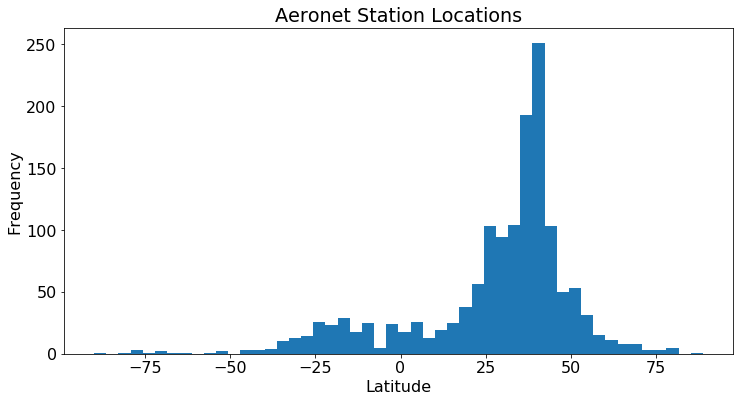

In [14]:
# Create a histogram with 50 bins
plt.hist(stationList["lat"], bins=50)
plt.title("Aeronet Station Locations")
plt.ylabel("Frequency")
plt.xlabel("Latitude")
plt.show()

### Time series data

Need to tell python the date strings in the file are dates/times.

In [15]:
groundStationPNNL = pd.read_csv('data/20180801_20180831_PNNL_lev15.csv')

In [16]:
# Convert the string dates and times to date format (Note: \ continues to new line)
groundStationPNNL['datetime'] = groundStationPNNL['Date(dd:mm:yyyy)'] + ' ' + groundStationPNNL['Time(hh:mm:ss)']

# Explicitly declare the format (for the full list, see http://strftime.org)
fmt = '%d:%m:%Y %H:%M:%S'
groundStationPNNL['datetime'] = pd.to_datetime(groundStationPNNL['datetime'], format=fmt)

### To plot a single variable

* Add the data using plt.plot(x='X Column Name', y='Y Column Name')

<div class="alert alert-block alert-info">

# Exercise 3


??? = Fill in the blank!


## Create a histogram

* Import the aeronet station list and locations from the file aeronet_locations_v3.txt using the pandas read_csv command.
* Plot a histogram of the longitude distribution of stations using the ???.hist(???) command

## Challenge: Create a time series plot

* Import time series data from 20180801_20180831_PNNL_lev15.csv.
* Create a new column in the dataframe with a string that combines the dates and times
* Convert the string of dates and times to datetime format using the pandas to_datetime command. 
    * Note: Explicitly specify the format of the dates and times in the string for pandas to parse.
* Use the ???.plot(x=???, y=???) to create a plot.
</div>

### Main steps for creating two side-by-side plots

* Before writing your plt.plot code, add:
plt.subplot( __row number__ , __column number__ , __position of the plot__ )

* Call plt.plot() and fill in the x and y variables for the first line/data series on the plot
* Call plt.sunplot again, increment the position of plot number
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

Example: 
* plt.subplot(2,1,1) places the plot in the first position of a two row, one column stack of plots.
* plt.subplot(1,2,2) places the plot in the second position of a two column, one row of plots next to each other.

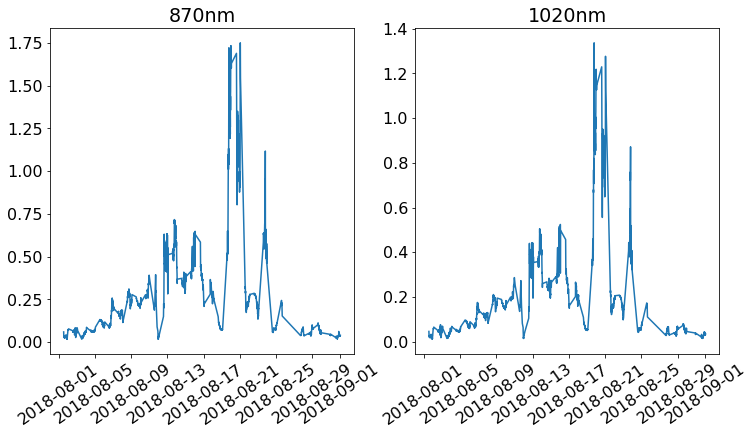

In [24]:
# Call the subplot - in column one, write the AOD_870nm plot
plt.subplot(1,2,1)

plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_870nm)
plt.xticks(rotation=35)
plt.title('870nm')

# Call the subplot - in column one, write the AOD_1020nm plot
plt.subplot(1,2,2)
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1020nm)
plt.xticks(rotation=35)
plt.title('1020nm')

plt.show()

### Main steps to combining the plots:

* Call plt.plot() and fill in the x and y variables for EACH line/data series on the plot
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

In [ ]:
# Question: How to I make separate plots?
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_870nm)
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1020nm)
plt.xticks(rotation=35)
plt.legend(['870nm', '1020nm'])
plt.show()

### Filtering Data
Sometimes there are values we don't want in our plots, e.g. missing data values of -999.0

In [ ]:
# The following plot is not very useful because the missing values are being added..
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1640nm)
plt.xticks(rotation=35)
plt.legend()
plt.show()

In [ ]:
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_870nm)
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1020nm)

# Filter out missing values by only using aeronetStaPNNL['AOD_1640nm'] > 0
keepRows = groundStationPNNL['AOD_1640nm'] >= 0
plt.plot(groundStationPNNL[keepRows].datetime, groundStationPNNL[keepRows].AOD_1640nm)
plt.legend()
plt.xticks(rotation=35)

plt.show()

## netCDF4
netCDF files organize data into groups, which are organized like directories in a filesystem. The groups are containers for variables, dimensions and attributes. 

The netCDF4 package is included in Anaconda Python. The main function is Dataset, which reads from an existing file:
```
file_id = Dataset("test.nc", "r", format="NETCDF4")
```
You can choose to 'w' (write), 'r' (read), or 'a'

The foramts can be: NETCDF3_CLASSIC, NETCDF3_64BIT_OFFSET, NETCDF3_64BIT_DATA, NETCDF4_CLASSIC, and NETCDF4 (default)

In [25]:
from netCDF4 import Dataset

# Note: if you are seeing errors, try re-launchng jupyter notebooks 
# from the terminal instead of anaconda navigator

In [31]:
# To open the files, call the Dataset constructor
file_id = Dataset('data/JRR-AOD_v1r1_npp_s201808091957192_e201808091958434_c201808092051240.nc')

# Quickly inspect the contents
file_id.variables.keys()

odict_keys(['Latitude', 'Longitude', 'StartRow', 'StartColumn', 'AOD550', 'AOD_channel', 'AngsExp1', 'AngsExp2', 'QCPath', 'AerMdl', 'FineMdlIdx', 'CoarseMdlIdx', 'FineModWgt', 'SfcRefl', 'SpaStddev', 'Residual', 'AOD550LndMdl', 'ResLndMdl', 'MeanAOD', 'HighQualityPct', 'RetrievalPct', 'QCRet', 'QCExtn', 'QCTest', 'QCInput', 'QCAll'])

In [ ]:
# Copy the AOD variable and the latitude and longitude coordinates into arrays object using .variables
AOD550 = file_id.variables['AOD550']

In [28]:
# Inspect attributes using .ncattrs command
file_id.variables['AOD550'].ncattrs()

['long_name', 'coordinates', 'units', '_FillValue', 'valid_range']

In [ ]:
# Get some very simple statistics by converting into a NumPy array
AOD550 = np.array(AOD550)

# Remove missing values
missing = file_id.variables['AOD550']._FillValue
keepRows = AOD550 != missing
AOD550 = AOD550[keepRows]

avgAOD = AOD550.mean()
stdDev = AOD550.std()
nAOD = AOD550.size

print(avgAOD, stdDev, nAOD)

<div class="alert alert-block alert-info">

# Exercise 4

## Import netCDF file
From the data folder, import "JRR-AOD_v1r1_npp_s201808091957192_e201808091958434_c201808092051240" using the Dataset command from the netcdf4 package.

## Inspect the list of variables
Get a list of variables after the file has been opening.

## Inspect the attributes of a given variable
What are the attributes of the QCAll variable?

</div>

## Closing up
I am available by email: rebekah.esmaili@gmail.com

* Some (free!) ways to learn: 
    * [CS Dojo](https://www.youtube.com/watch?v=Z1Yd7upQsXY&list=PLBZBJbE_rGRWeh5mIBhD-hhDwSEDxogDg) Youtube series for absolute beginners
    * [Automate boring stuff](https://automatetheboringstuff.com)
    * [Codeacademy](https://www.codecademy.com/learn/learn-python)
    * [Local Meetups](https://www.meetup.com/find/tech/)
    * Start a NOAA Python Club!

Next session: Friday, Nov 9th 9:30-11:30am

## Thank you!
I hope you enjoyed this crash course in python in remote sensing applications! Please give us feedback.